# **Análise de Dados**

## **Introdução**

A análise de dados será feita utilizando os dados de **RH da IBM** disponibilizados <a href="https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?select=WA_Fn-UseC_-HR-Employee-Attrition.csv" target="_blank">aqui</a>.

A motivação para realizar essa análise é entender o perfil dos colaboradores que deixam a empresa, o que pode ser importante para prevenir demissões, diminuir custos operacionais e melhorar a satisfação dos empregados, o que, consequentemente, deve aumentar a produtividade da empresa.

Peguntas que tentaremos responder com a análise:

- Existe disparidade salarial entre os gêneros dos colaboradores?
- Há evidências de que o gênero impacta no atrito colaborador-empresa?
- Qual é a relação entre salário e departamento do colaborador?

### **Carregando bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### **Carregando o conjunto de dados**

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### **Análise Univariada**

#### **Idade**

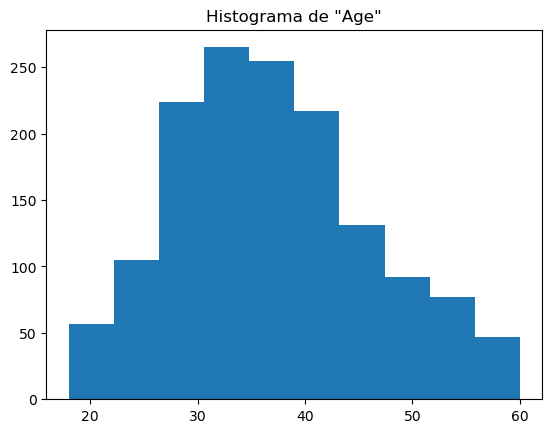

In [34]:
plt.hist(df['Age'])
plt.title('Histograma de "Age"')
plt.show()

Observa-se que a distribuição da variável `Age` possui leve assimetria. As idades mais frequentes estão em torno de 30 e 40 anos. 

#### **Salário**

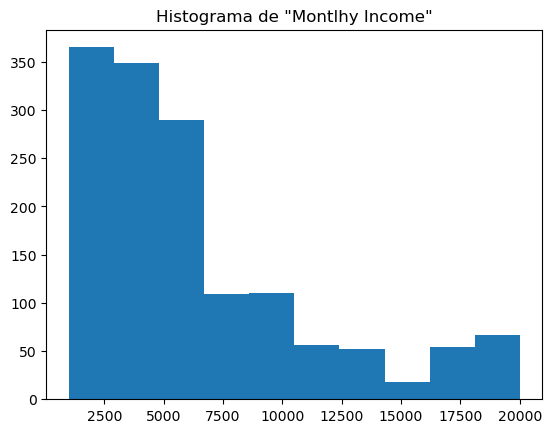

In [33]:
plt.hist(df['MonthlyIncome'])
plt.title('Histograma de "Montlhy Income"')
plt.show()

Observa-se que a maioria dos salários concentra-se em uma faixa de até $5.000,00, o que é a realidade de grande parte das empresas, em que a maioria de seus colaboradores possuem salários menores.

#### **Gênero**

Para avaliarmos a variável `Gender`:

In [89]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

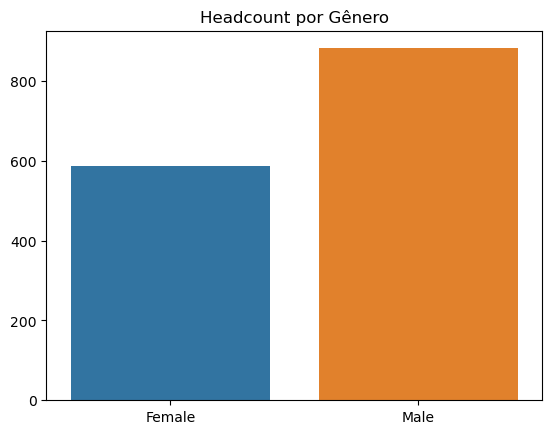

In [88]:
sns.countplot(data=df, x='Gender')
plt.xlabel('')
plt.ylabel('')
plt.title('Headcount por Gênero')
plt.show()

Verifica-se que a maioria do quadro de colaboradores é de pessoas do gênero masculino (60%).

#### **Formação**

Para avaliarmos a variável `Education Field`:

In [18]:
df['EducationField'].value_counts(normalize=True) * 100

EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64

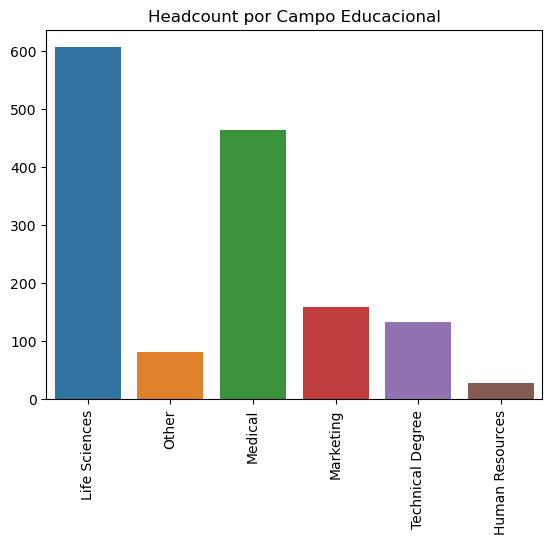

In [49]:
sns.countplot(data=df, x='EducationField')
plt.title('Headcount por Campo Educacional')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

Observa-se que a maioria dos colaboradores possui formação na área de Life Science. Human Resources é a área com menor quantidade de colaboradores formados.

### **Análise bivariada**

#### **Variação Salarial x Gênero**

In [78]:
df.groupby(['Gender'])[['MonthlyIncome']].mean()

,MonthlyIncome
Gender,
Female,6686.566327
Male,6380.507937


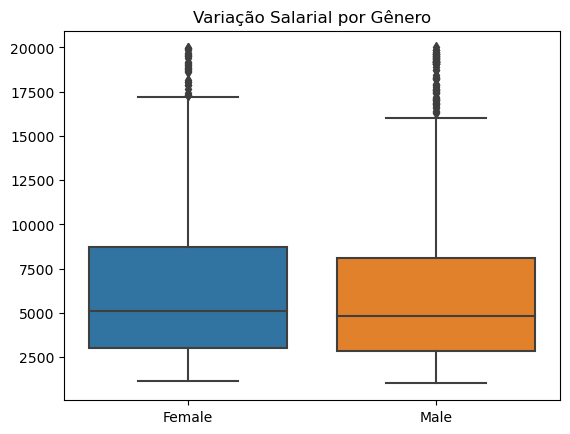

In [48]:
sns.boxplot(data=df, x='Gender', y='MonthlyIncome')
plt.title('Variação Salarial por Gênero')
plt.xlabel('')
plt.ylabel('')
plt.show()

Curiosamente, a distribuição salarial entre pessoas do gênero masculino e feminino é parecida. Normalmente, espera-se encontrar salários mais altos para pessoas do gênero masculino. Porém, no caso da IBM, o *gender gap* parece não ocorrer.

#### **Salário x Departamento**

In [79]:
df.groupby(['Gender', 'Department'])[['MonthlyIncome']].mean()

MonthlyIncome
Gender Department                           
Female Human Resources           7264.000000
       Research & Development    6513.691293
       Sales                     6972.126984
Male   Human Resources           6371.023256
       Research & Development    6129.888316
       Sales                     6949.645914

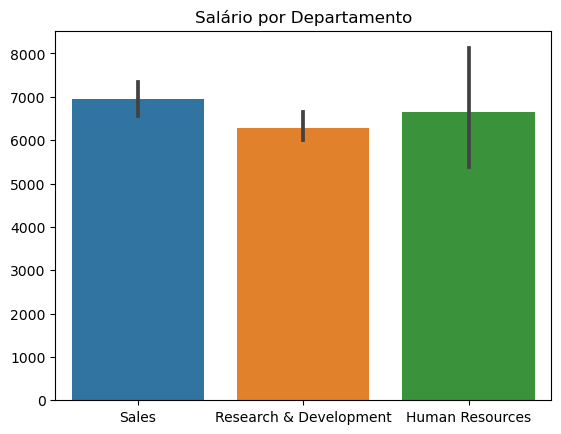

In [73]:
sns.barplot(data=df, x='Department', y='MonthlyIncome')
plt.title('Salário por Departamento')
plt.xlabel('')
plt.ylabel('')
plt.show()

Constata-se que a maior média salarial ocorre no departamento 'Sales', seguido do 'Human Resources' e, por fim, 'Research & Development Department'.

#### **Gênero x Atrito**

In [84]:
df.groupby(['Gender', 'Attrition'])[['Attrition']].count()

Attrition
Gender Attrition           
Female No               501
       Yes               87
Male   No               732
       Yes              150

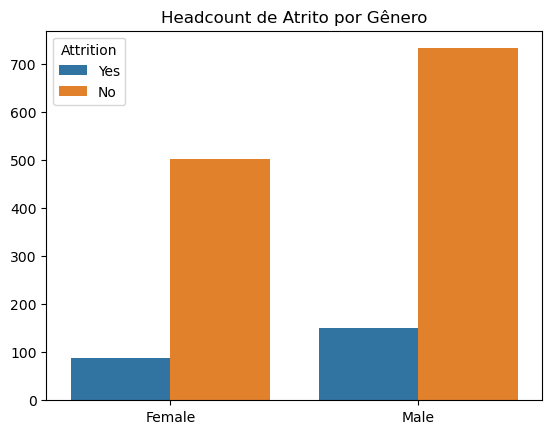

In [86]:
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.xlabel('')
plt.ylabel('')
plt.title('Headcount de Atrito por Gênero')
plt.show()

### **Análise multivariada**

Para a realização de uma análise multivariada, verificaremos a correlação entre as variáveis numéricas do *dataset*.

Para obtermos a matriz de correlação, primeiramente selecionaremos somente as variáveis numéricas do *dataframe*.

In [50]:
df_numerico = df.select_dtypes(include=np.number)
df_numerico

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [65]:
lista_colunas = df_numerico.columns.tolist()
lista_colunas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

As variáveis `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `RelationshipSatisfaction`, `StockOptionLevel` e `WorkLifeBalance` devem ser removidas. Por mais que seus valores sejam numéricos, nesse caso os números estão sendo utilizados para categorizá-las. Sendo assim, essas variáveis são entendidas como categóricas. As variáveis `EmployeeCount`, `EmployeeNumber` e `StandardHours` também devem ser removidas, já que não impactam na análise.

Para obtermos a lista de variáveis a serem correlacionadas:

In [69]:
lista_subtrair = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']

lista_resultante = []

for elemento in lista_colunas:
    if elemento not in lista_subtrair:
        lista_resultante.append(elemento)

lista_resultante

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Obtendo a matriz de correlação:

In [70]:
matriz_correlacao = df[lista_resultante].corr()

Avaliaremos a correlação entre as variáveis por meio de um mapa de calor.

A fim de melhorar a visualização do mapa de calor criaremos uma máscara para este gráfico com base em uma matriz triangular superior, em que os elementos da diagonal principal serão iguais a 1.

Para isso, utilizaremos o método `np.ones_like()` e passaremos a matriz de correlação como argumento. Dessa maneira, será criada uma matriz de dimensões iguais as dimensões da matriz correlação. Em seguida, aplicaremos o método `np.triu()` passando como argumento o resultado da aplicação do método anterior e assim obteremos uma matriz triangular superior, que será utilizada como máscara no mapa de calor. 

In [90]:
mascara = np.triu(np.ones_like(matriz_correlacao))

Para obtermos o mapa de calor:

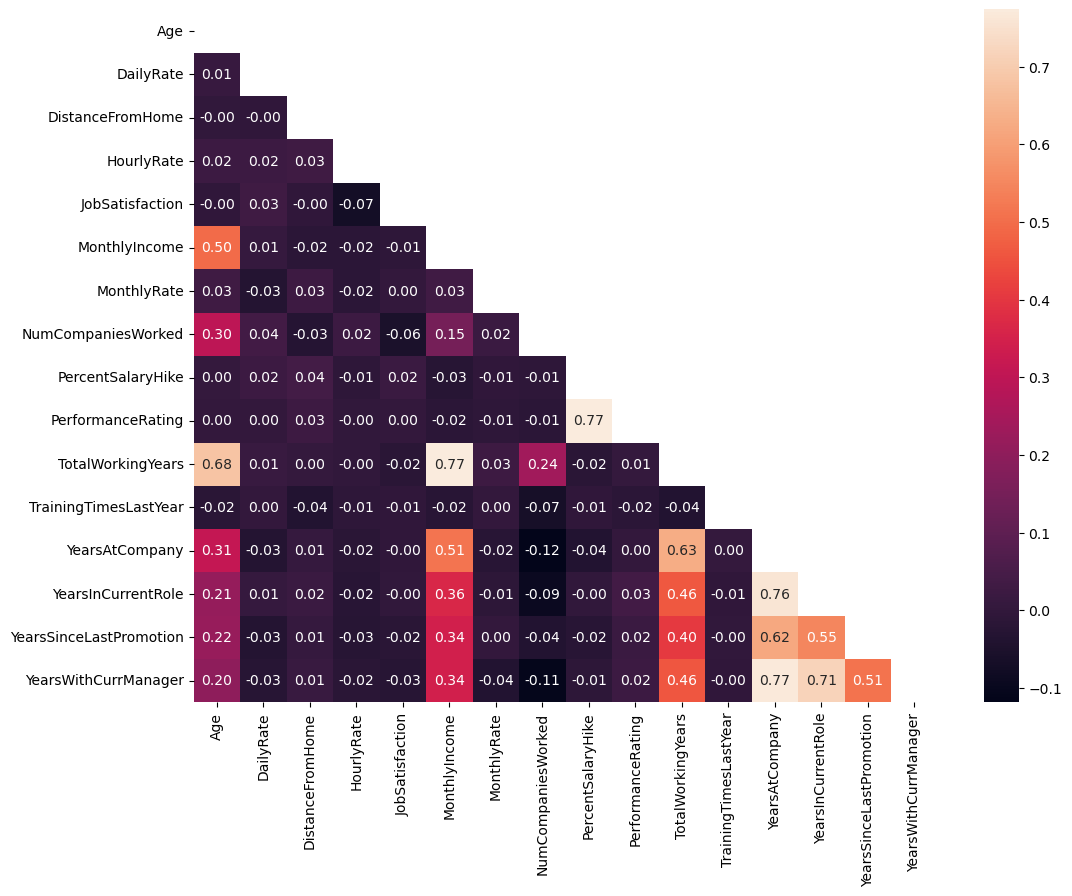

In [91]:
plt.figure(figsize=(12,9))
sns.heatmap(data=matriz_correlacao, annot=True, fmt='.2f', mask=mascara)
plt.show()